In [25]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [26]:
!pip install -Uqq fastai fastbook

In [28]:
from fastcore.all import *
from fastbook import search_images_ddg

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images)

In [29]:
urls = search_images('rabbit oryctolagus', max_images=1)
urls[0]

Searching for 'rabbit oryctolagus'


'https://c8.alamy.com/comp/BX8K52/baby-wild-european-rabbit-oryctolagus-cuniculus-BX8K52.jpg'

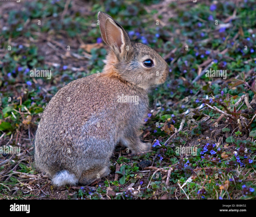

In [30]:
from fastdownload import download_url 
download_url(urls[0], 'rabbit.jpg', show_progress=False)

from fastai.vision.all import *
im = Image.open('rabbit.jpg')
im.to_thumb(256, 256)

Searching for 'hare lepus'


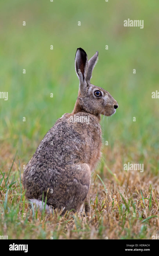

In [38]:
download_url(search_images('hare lepus', max_images=1)[0], 'hare.jpg', show_progress = False)
im = Image.open('hare.jpg')
im.to_thumb(256, 256)

In [44]:
searches = 'rabbit oryctolagus', 'hare lepus'
path = Path('rabbit_or_hare')

from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok = True, parents= True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o) 

Searching for 'rabbit oryctolagus'
Searching for 'hare lepus'


In [45]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(len(failed))

0


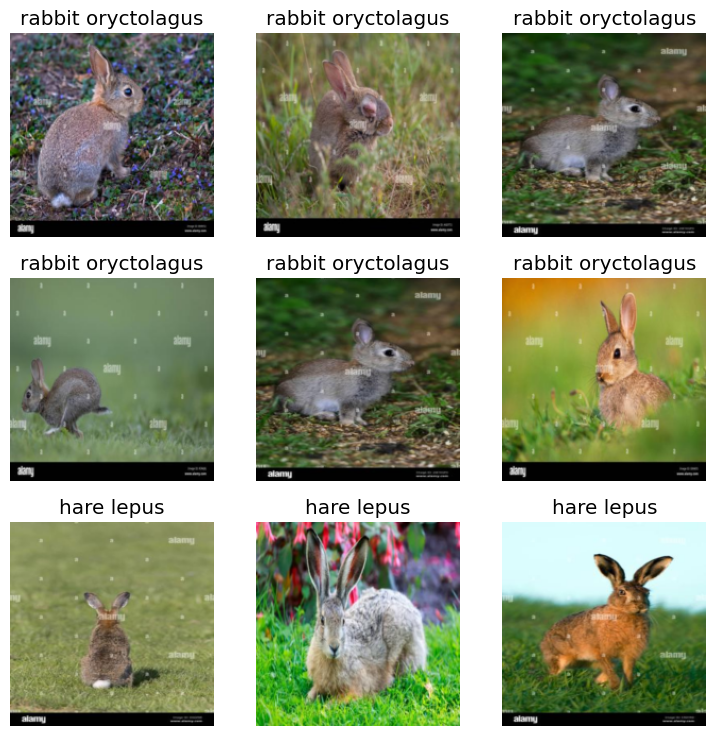

In [48]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]    
).dataloaders(path)

dls.show_batch(max_n=9)

In [62]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.201735,0.792214,0.456522,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.663222,0.379023,0.130435,00:01
1,0.491027,0.095820,0.021739,00:01
2,0.350436,0.039836,0.021739,00:01
3,0.267700,0.021366,0.000000,00:01


In [59]:
is_rabbit,_,probs = learner.predict(PILImage.create('rabbit.jpg')) 
print(f"This is a: {is_rabbit}.")
print(f"Probability it's a rabbit: {probs[1]:.4f}")

This is a: rabbit oryctolagus.
Probability it's a rabbit: 0.9985


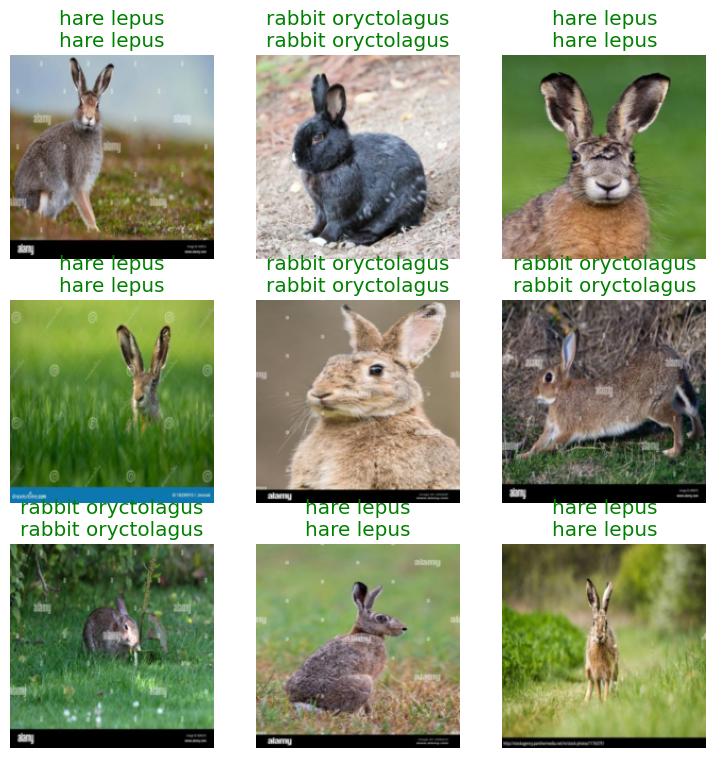

In [63]:
learner.show_results()